In [7]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [8]:
#Loading the data:
train  = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"})
test   = pd.read_csv("test.csv")

In [9]:
train.head(10) #checking first 10 rows of the training dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [10]:
test.head(10) #checking first 10 rows of the testing dataset

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


In [11]:
print("shape of training data is: ",train.shape) #checking the number of rows and columns in training data
print("shape of test data is: ",test.shape) #checking the number of rows and columns in test data

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [12]:
train.dtypes #checking the data-types in training dataset

,0
fare_amount,object
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,float64


In [13]:
test.dtypes #checking the data-types in test dataset

,0
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [14]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [15]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [16]:
#Convert fare_amount from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [17]:
train.dtypes

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,float64


In [18]:
train.shape

(16067, 7)

In [19]:
train.dropna(subset= ["pickup_datetime"])   #dropping NA values in datetime column

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [20]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [21]:
# Now separate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [22]:
train.dtypes #Re-checking datatypes after conversion

,0
fare_amount,float64
pickup_datetime,datetime64[ns]
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,float64
year,float64
Month,float64
Date,float64


In [23]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [24]:
# Now separate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [25]:
test.dtypes #Re-checking test datatypes after conversion

,0
pickup_datetime,datetime64[ns]
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
year,int32
Month,int32
Date,int32
Day,int32


In [26]:
#Observations :
#An outlier in pickup_datetime column of value 43
#Passenger count should not exceed 6(even if we consider SUV)
#Latitudes range from -90 to 90. Longitudes range from -180 to 180
#Few missing values and High values of fare and Passenger count are present. So, decided to remove them

In [27]:
#removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [28]:
#Checking the passenger count variable :

train["passenger_count"].describe()

,passenger_count
count,16011.000000
mean,2.625171
std,60.846021
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5345.000000


In [29]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)
#Also removing the values with passenger count of 0.
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [30]:
train["passenger_count"].describe()


,passenger_count
count,15934.000000
mean,1.649581
std,1.265943
min,0.120000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [31]:
train["passenger_count"].sort_values(ascending= True)


,passenger_count
8862,0.12
0,1.00
9790,1.00
9791,1.00
9792,1.00
...,...
8076,NaN
8139,NaN
8259,NaN
8306,NaN


In [32]:
#removing passanger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [33]:
#There is one passenger count value of 0.12 which is not possible. Hence we will remove fractional passenger value

train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
train.shape

(15933, 13)

In [34]:
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

,fare_amount
1015,54343.0
1072,4343.0
607,453.0
980,434.0
1335,180.0
...,...
1712,NaN
2412,NaN
2458,NaN
8178,NaN


In [35]:
Counter(train["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [36]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(15930, 13)

In [37]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(15928, 13)

In [38]:
# eliminating rows for which value of "fare_amount" is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15904, 13)
0


In [39]:
train["fare_amount"].describe()

,fare_amount
count,15904.000000
mean,15.064940
std,432.323764
min,1.140000
25%,6.000000
50%,8.500000
75%,12.500000
max,54343.000000


In [40]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [41]:
#Hence dropping one value of >90
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [42]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [43]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [44]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [45]:
train.shape

(15903, 13)

In [46]:
train.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
year,0
Month,0
Date,0


In [47]:
test.isnull().sum()

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
year,0
Month,0
Date,0
Day,0


In [48]:
#As we know that we have given pickup longitute and latitude values and same for drop.
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [49]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)


<ipython-input-48-17a85878ff26>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
<ipython-input-48-17a85878ff26>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
<ipython-input-48-17a85878ff26>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
<ipython-input-48-17a85878ff26>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

In [50]:
test['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)


<ipython-input-48-17a85878ff26>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
<ipython-input-48-17a85878ff26>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
<ipython-input-48-17a85878ff26>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
<ipython-input-48-17a85878ff26>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

In [51]:
train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,2011.0,1.0,6.0,3.0,9.0,50.0,3.787239
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,2012.0,11.0,20.0,1.0,20.0,35.0,1.555807
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,2012.0,1.0,4.0,2.0,17.0,22.0,4.155444
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2009.0,9.0,2.0,2.0,1.0,11.0,2.849627
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0,2012.0,4.0,8.0,6.0,7.0,30.0,1.374577


In [52]:
test.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,1.030764
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,8.450134
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,1.389525
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,2.799270
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,1.999157
5,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,2012,12,1,5,21,12,3.787239
6,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,2011,10,6,3,12,10,1.555807
7,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,2011,10,6,3,12,10,4.155444
8,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,2011,10,6,3,12,10,NaN
9,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,2014,2,18,1,15,22,2.849627


In [53]:
train.nunique()

,0
fare_amount,461
pickup_datetime,15858
pickup_longitude,13674
pickup_latitude,14112
dropoff_longitude,13765
dropoff_latitude,14138
passenger_count,7
year,7
Month,12
Date,31


In [54]:
test.nunique()

,0
pickup_datetime,1753
pickup_longitude,9124
pickup_latitude,9246
dropoff_longitude,9141
dropoff_latitude,9360
passenger_count,6
year,7
Month,12
Date,31
Day,7


In [55]:
##finding decending order of fare to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False)

,distance
9147,8667.542104
8647,8667.497512
2397,8667.454421
472,8667.304968
11653,8666.701504
...,...
8982,0.000000
7009,0.000000
4769,0.000000
3711,0.000000


In [56]:
#The top 23 values in the distance variable are unusually high, indicating travel distances of over 8000 kilometers.
#After the 23rd value, the distance drops significantly to 127 kilometers, suggesting the presence of outliers that need to be removed.
Counter(train['distance'] == 0)


Counter({False: 15449, True: 454})

In [57]:
Counter(test['distance'] == 0)


Counter({False: 9641, True: 273})

In [58]:
Counter(train['fare_amount'] == 0)


Counter({False: 15903})

In [60]:
# Now remove the rows whose distance value is zero

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15449, 14)

In [61]:
# Now remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15426, 14)

In [62]:
train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,2011.0,1.0,6.0,3.0,9.0,50.0,3.787239
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,2012.0,11.0,20.0,1.0,20.0,35.0,1.555807
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,2012.0,1.0,4.0,2.0,17.0,22.0,4.155444
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2009.0,9.0,2.0,2.0,1.0,11.0,2.849627
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0,2012.0,4.0,8.0,6.0,7.0,30.0,1.374577


In [63]:
# We have now split the pickup_Date variable into separate variables such as month, year, and day, making the original pickup_Date variable redundant.
# Therefore, we can drop it. Additionally, since we have already calculated the distance using the pickup and drop-off longitudes and latitudes, we can also drop the pickup and drop-off longitude and latitude variables.
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [64]:
train.head(10)

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157
5,12.1,1.0,2011.0,1.0,6.0,3.0,9.0,3.787239
6,7.5,1.0,2012.0,11.0,20.0,1.0,20.0,1.555807
7,16.5,1.0,2012.0,1.0,4.0,2.0,17.0,4.155444
9,8.9,2.0,2009.0,9.0,2.0,2.0,1.0,2.849627
10,5.3,1.0,2012.0,4.0,8.0,6.0,7.0,1.374577


In [65]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [66]:
train.dtypes

,0
fare_amount,float64
passenger_count,int64
year,int64
Month,int64
Date,int64
Day,int64
Hour,int64
distance,float64


In [67]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [68]:
train.head(10)

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157
5,12.1,1,2011,1,6,3,9,3.787239
6,7.5,1,2012,11,20,1,20,1.555807
7,16.5,1,2012,1,4,2,17,4.155444
9,8.9,2,2009,9,2,2,1,2.849627
10,5.3,1,2012,4,8,6,7,1.374577


In [69]:
test.dtypes

,0
passenger_count,int64
year,int32
Month,int32
Date,int32
Day,int32
Hour,int32
distance,float64


<Axes: xlabel='passenger_count', ylabel='count'>

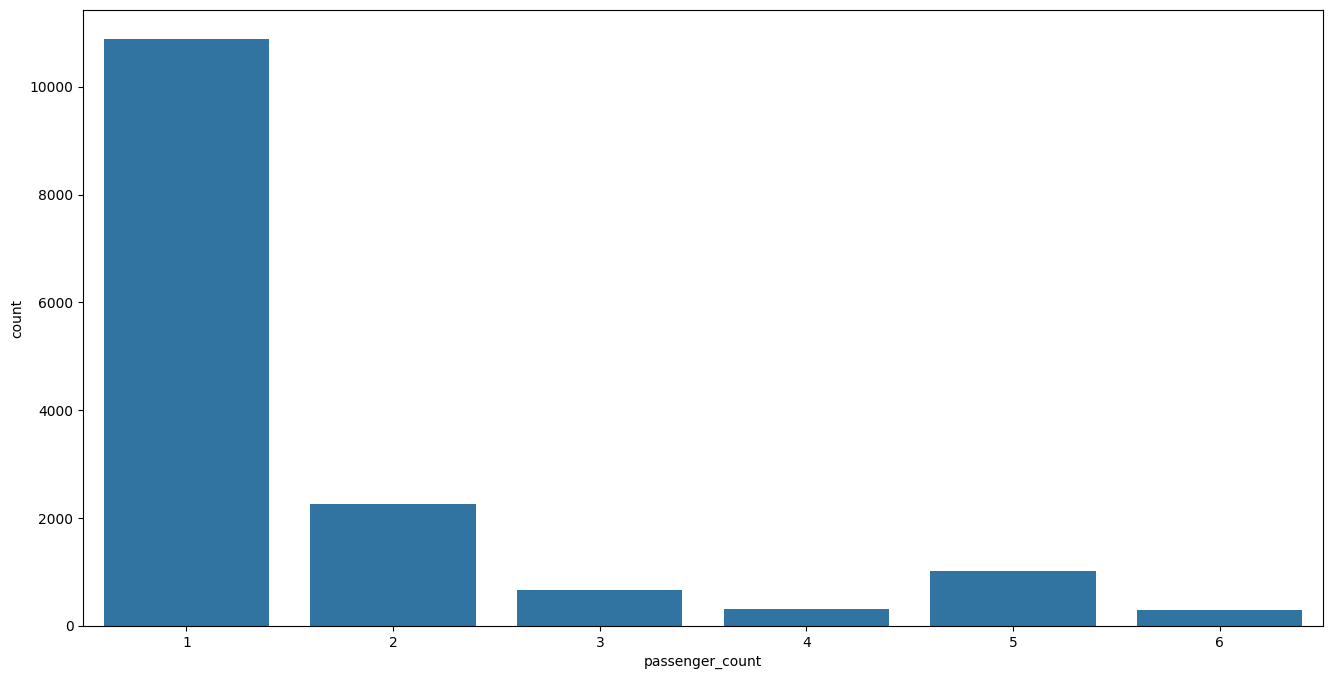

In [70]:
# Data Visualization of following:
#Number of Passengers effects the the fare
#Pickup date and time effects the fare
#Day of the week does effects the fare
#Distance effects the fare

# Count plot on passenger count
plt.figure(figsize=(16,8))
sns.countplot(x="passenger_count", data=train)

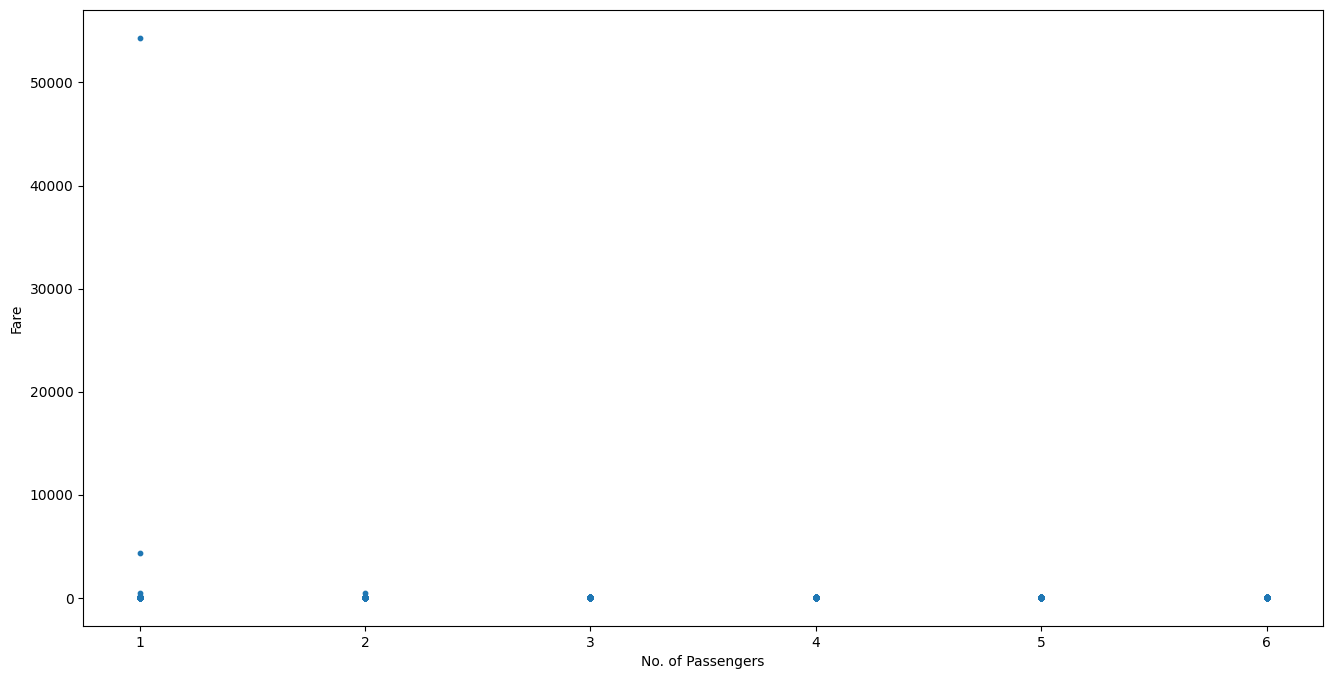

In [71]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(16,8))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

In [72]:
#Observations:
#From the above plots, we can conclude the following:
  #Single-passenger trips are the most frequent.
  #Additionally, the highest fares are primarily from trips with one or two passengers.

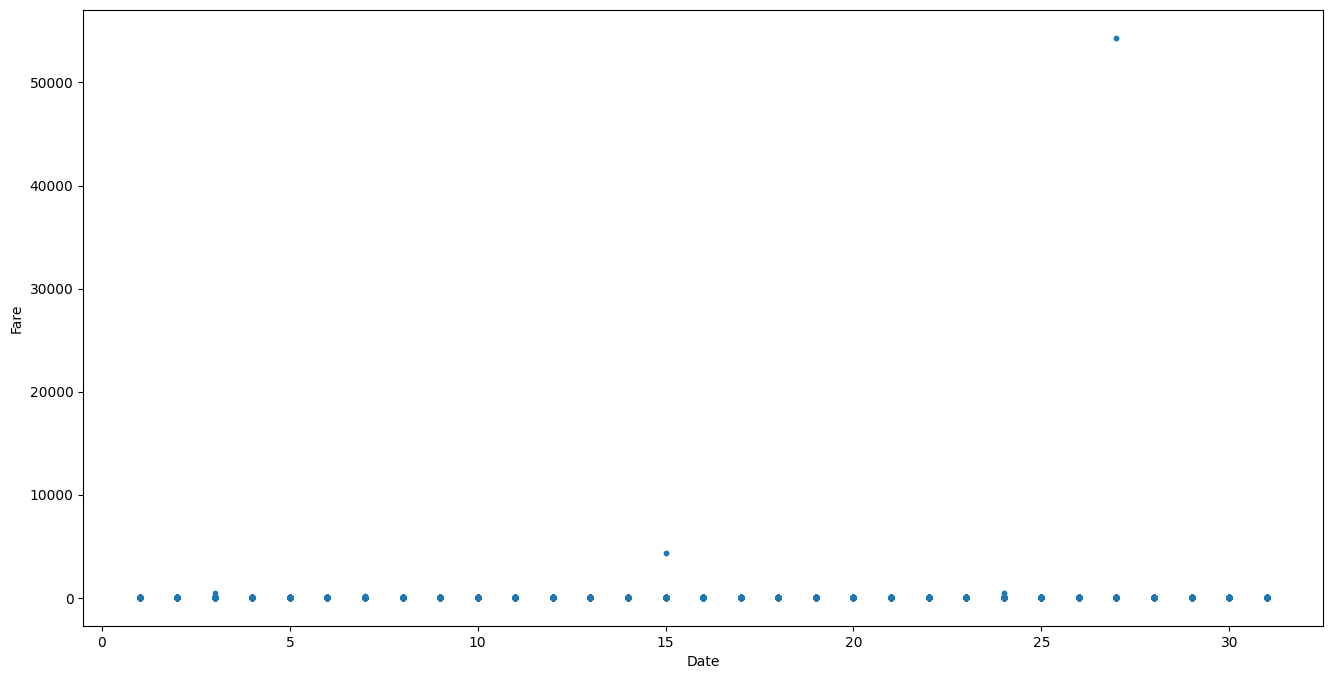

In [74]:
#Relationship between date and Fare
plt.figure(figsize=(16,8))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

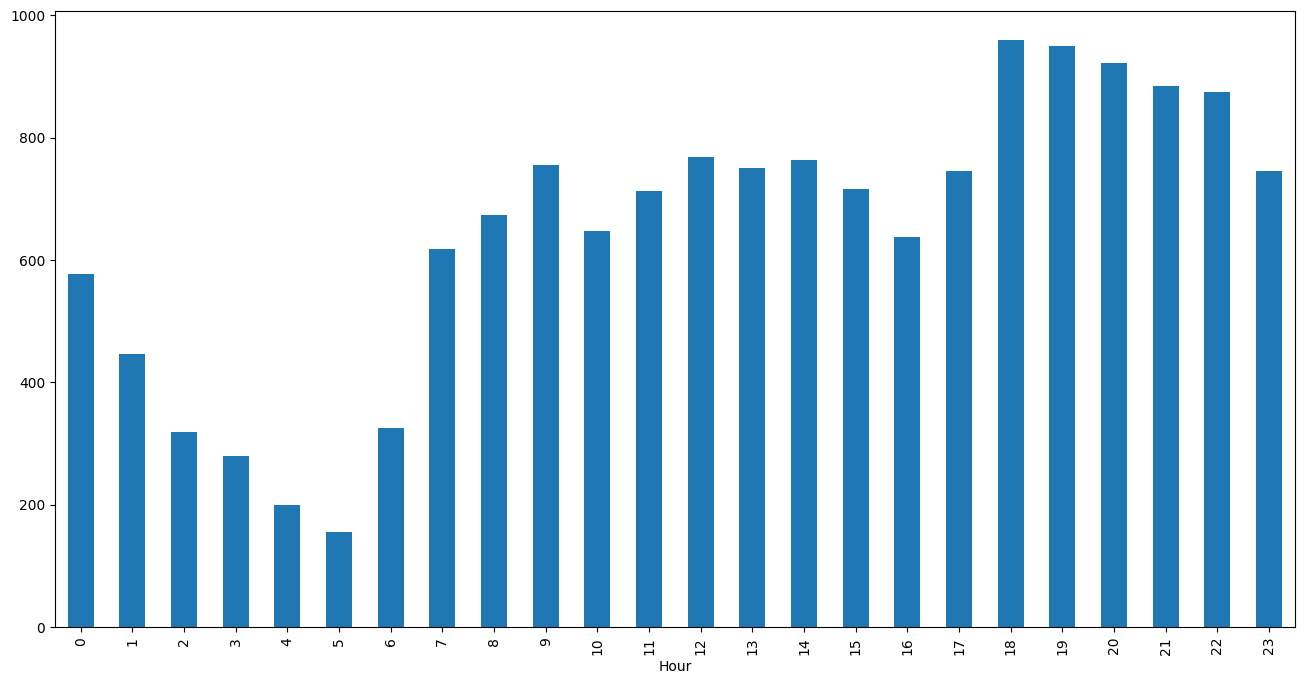

In [75]:
plt.figure(figsize=(16,8))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

In [76]:
#Observations:
  # Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

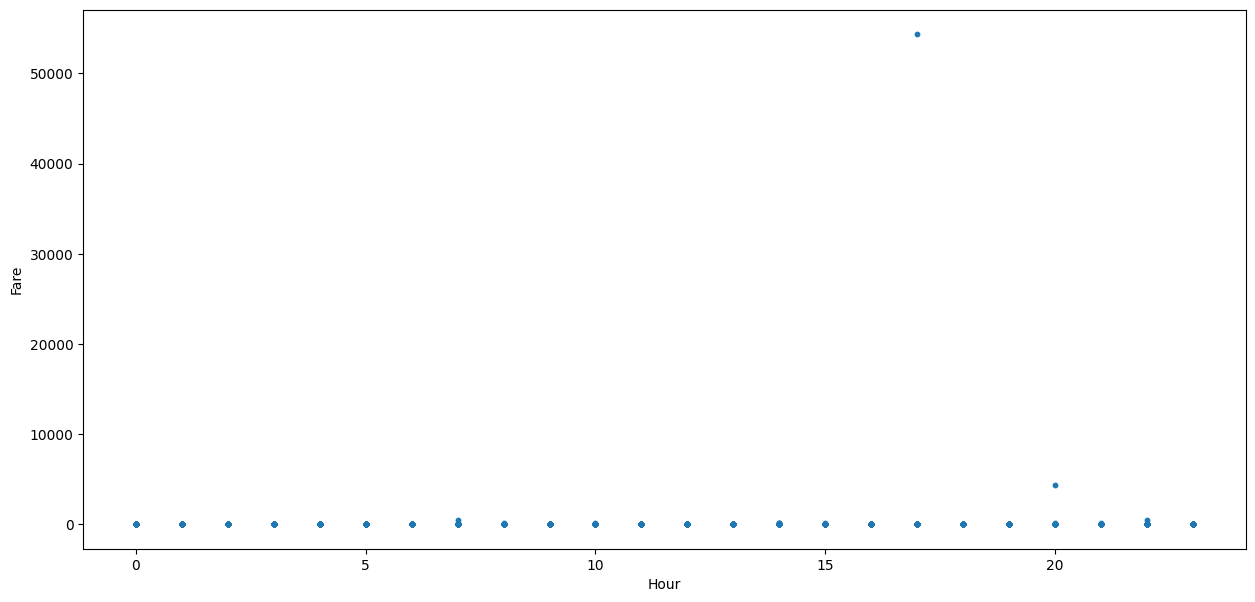

In [79]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

<Axes: xlabel='Day', ylabel='count'>

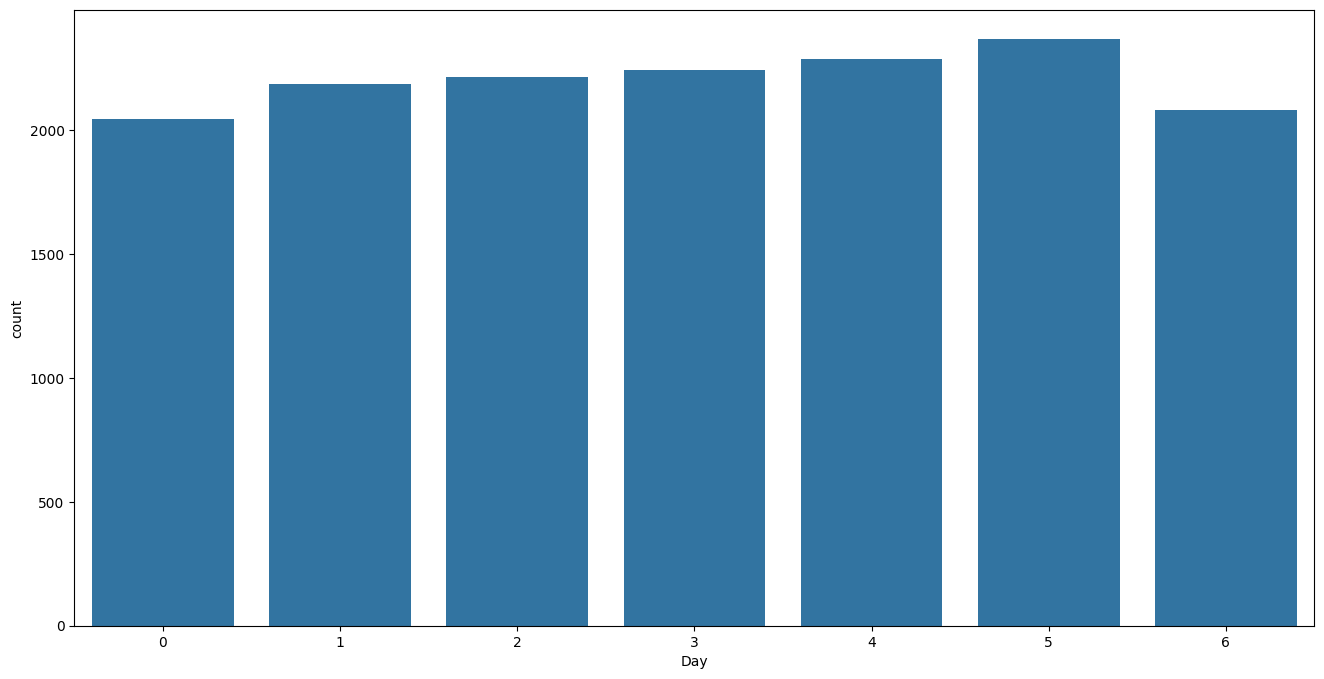

In [81]:
#impact of Day on the number of cab rides
plt.figure(figsize=(16,8))
sns.countplot(x="Day", data=train)

In [82]:
# Observation : The day of the week does not seem to have much influence on the number of cabs ride

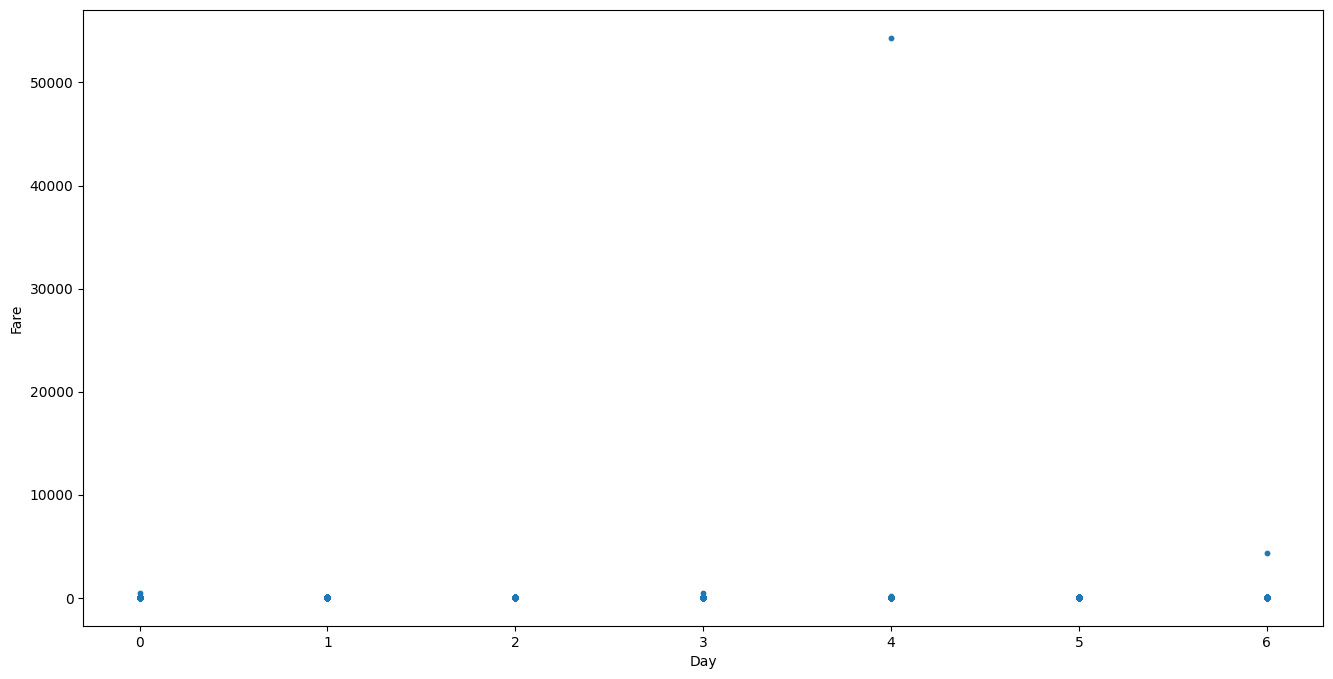

In [83]:
#Relationships between day and Fare
plt.figure(figsize=(16,8))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

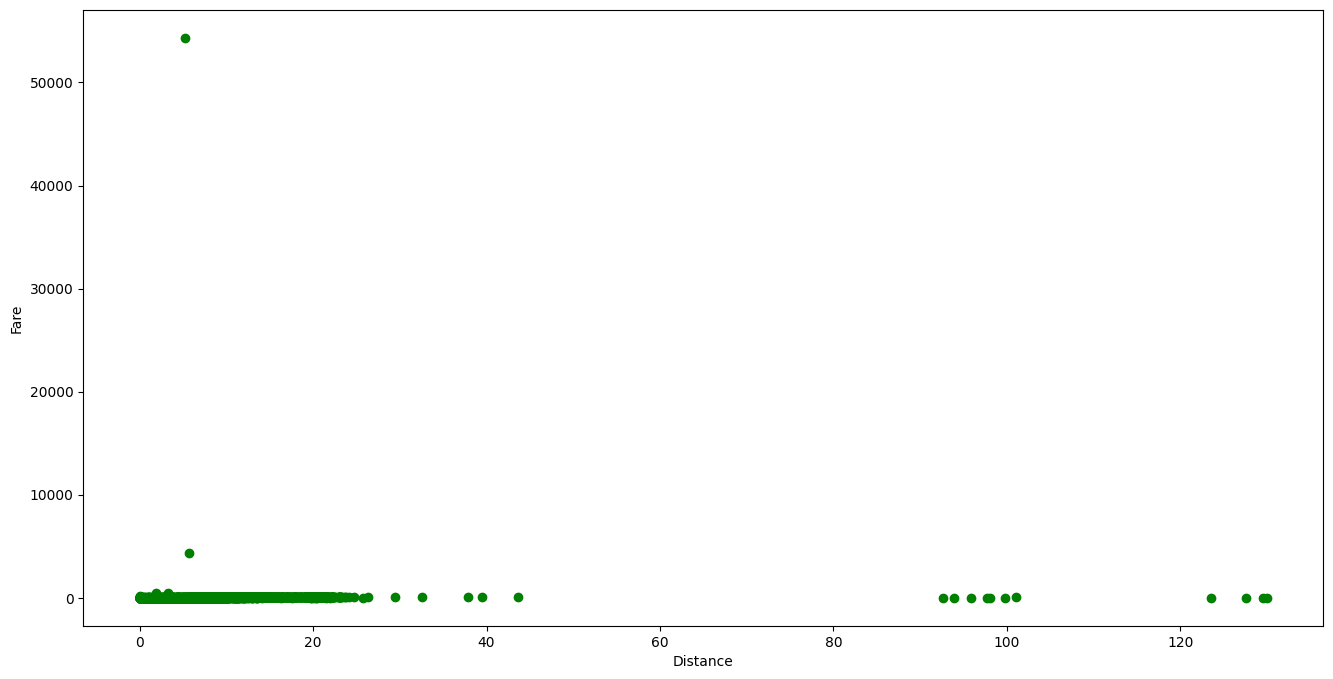

In [85]:
#Relationship between distance and fare
plt.figure(figsize=(16,8))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

fare_amount


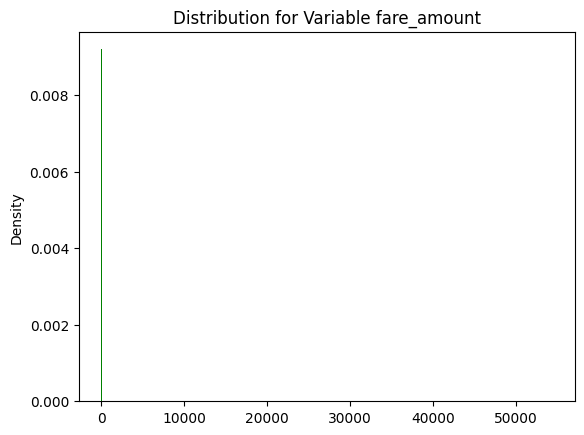

distance


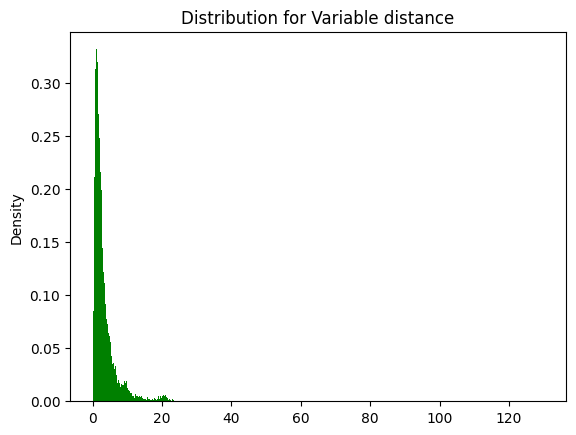

In [95]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    plt.hist(train[i], bins=500, color='green', density=True)
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [96]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


<ipython-input-97-7aa0ff866ab0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


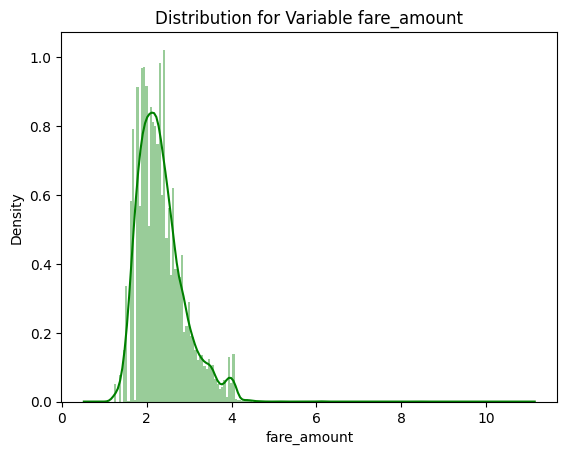

distance


<ipython-input-97-7aa0ff866ab0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


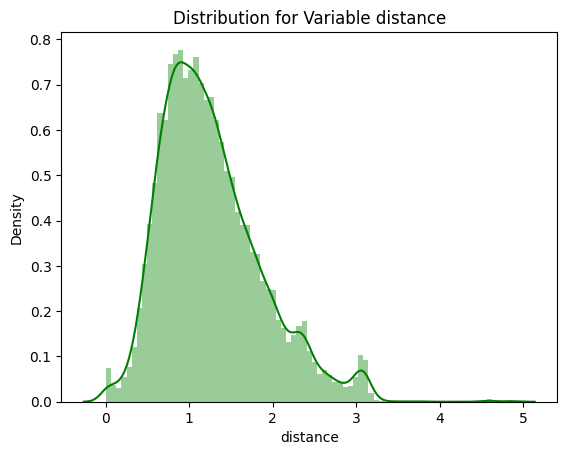

In [97]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [98]:
# We can observe a bell-shaped distribution, indicating that our continuous variables are now normally distributed.
#  As a result, we will not apply any feature scaling techniques such as normalization or standardization to our training data.

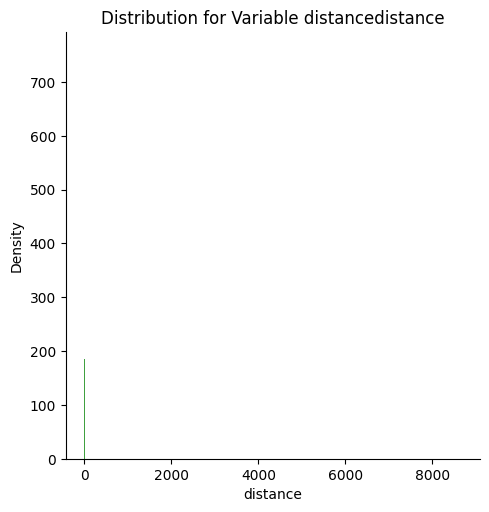

In [103]:
#Normality check for test data is uniformly distributed or not-

sns.displot(test['distance'], bins='auto', color='green')
plt.title("Distribution for Variable distance" + i)
plt.ylabel("Density")
plt.show()

In [104]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

<ipython-input-105-c9cc44daf57e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['distance'],bins='auto',color='green')


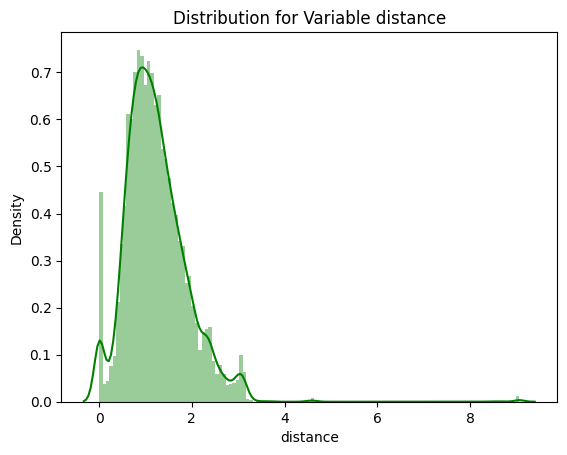

In [105]:
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

Now Applying ML Algorithms

In [106]:
# train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'],
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [107]:
print(X_train.shape)
print(X_test.shape)

(12340, 7)
(3086, 7)


**Linear Regression Model :**

In [108]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [109]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [110]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [111]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [112]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.2810428818733372
Root Mean Squared Error For Test data = 0.28018700766593924


In [113]:
# calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7451830375898875

In [114]:
r2_score(y_test, pred_test_LR)


0.7229912451888476

**Decision Tree Model**

In [115]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)


In [116]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [117]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [118]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.3075421282468058
Root Mean Squared Error For Test data = 0.30747731640245224


In [119]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)
0.7033678616157003

0.7033678616157003

In [120]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)


0.6664018197939096

**Random Forest Model :**

In [121]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)


In [122]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [123]:
# calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [124]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.09830229951708178
Root Mean Squared Error For Test data = 0.2747591466097451


In [125]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.968824709559961

In [126]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.7336198700045107

**Gradient Boosting :**

In [127]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)


In [128]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [129]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [130]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.23531833608025413
Root Mean Squared Error For Test data = 0.2523484029940182


In [131]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.7753022983851253

In [132]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8213534260781309

**Optimizing the results with parameters tuning :**

In [133]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [135]:
# Random Hyperparameter Grid

from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [136]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.74.
RMSE =  0.27383595137642136


In [137]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [138]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.68.
RMSE =  0.30094376286576513


In [139]:
from sklearn.model_selection import GridSearchCV
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.76.
RMSE =  0.26245870981322406


In [140]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.75.
RMSE =  0.26607340616930486


**Prediction of fare from provided test dataset :**

In [142]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
#Handle missing values in the 'test' dataframe.
#Using a simple imputer to fill in missing values with the mean.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') #Could also use 'median' or other strategies.
test_imputed = imputer.fit_transform(test)
predictions_GRF_test_Df = gridcv_rf.predict(test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [143]:
predictions_GRF_test_Df

array([1.92169509, 3.29910639, 1.97749816, ..., 1.85983814, 2.14047448,
       2.14047448])

In [144]:
test['Predicted_fare'] = predictions_GRF_test_Df


In [145]:
test.head(10)

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,0.708412,1.921695
1,1,2015,1,27,1,13,2.246029,3.299106
2,1,2011,10,8,5,11,0.871095,1.977498
3,1,2012,12,1,5,21,1.334809,2.329043
4,1,2012,12,1,5,21,1.098331,2.182447
5,1,2012,12,1,5,21,1.565954,2.465669
6,1,2011,10,6,3,12,0.938368,1.991177
7,1,2011,10,6,3,12,1.640053,2.567535
8,1,2011,10,6,3,12,NaN,2.221290
9,1,2014,2,18,1,15,1.347976,2.431502


In [146]:
test.to_csv('test.csv')